In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
dc = pd.read_csv('/Users/justinsmith/Documents/GitHub/DC_Properties.csv')

In [3]:
dc_re = dc.dropna(subset=['PRICE'])

In [4]:
dc_re = dc_re.drop(index=56600)

In [5]:
dc_re['AYB'] = dc_re['AYB'].fillna(0)
dc_re['YR_RMDL'] = dc_re['YR_RMDL'].fillna(0)

In [6]:
for i in range(len(dc_re)):
    if dc_re.iloc[i,8] == 0:
        dc_re.iloc[i,8] = dc_re.iloc[i,10]

for i in range(len(dc_re)):
    if dc_re.iloc[i,9] == 0:
        dc_re.iloc[i,9] = dc_re.iloc[i,10]

In [7]:
for i in range(len(dc_re)):
    if dc_re.iloc[i,8] > dc_re.iloc[i,10]:
        dc_re.iloc[i,10] = dc_re.iloc[i,8]
        
for i in range(len(dc_re)):
    if dc_re.iloc[i,10] > dc_re.iloc[i,9]:
        dc_re.iloc[i,9] = dc_re.iloc[i,10]

In [8]:
dc_re_resid = dc_re[dc_re['SOURCE'] == 'Residential']

In [9]:
dc_re_resid.dropna(axis=1, how='all', inplace=True)
dc_re_resid.drop(columns=['Unnamed: 0','FULLADDRESS', 'CENSUS_BLOCK', 'NATIONALGRID',
                          'ASSESSMENT_SUBNBHD','X','Y','GIS_LAST_MOD_DTTM',
                          'QUADRANT', 'CITY', 'STATE', 'SOURCE'], inplace=True)
dc_re_resid.dropna(inplace=True)

In [10]:
dc_re_resid['SALEDATE']  = pd.to_datetime(dc_re_resid['SALEDATE']).dt.date
dc_re_resid['SALEDATE'] = pd.to_datetime(dc_re_resid['SALEDATE'])
dc_re_resid[['year','month','day']] = dc_re_resid.SALEDATE.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
dc_re_resid.drop(columns=['day','SALEDATE'], inplace=True)

In [11]:
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Low Quality'] = 0
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Fair Quality'] = 1
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Average'] = 2
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Above Average'] = 3
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Good Quality'] = 4
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Very Good'] = 5
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Excellent'] = 6
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Superior'] = 7
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Exceptional-A'] = 8
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Exceptional-B'] = 9
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Exceptional-C'] = 10
dc_re_resid['GRADE'][dc_re_resid['GRADE'] == 'Exceptional-D'] = 11

In [12]:
dc_re_resid['CNDTN'][dc_re_resid['CNDTN'] == 'Poor'] = 0
dc_re_resid['CNDTN'][dc_re_resid['CNDTN'] == 'Fair'] = 1
dc_re_resid['CNDTN'][dc_re_resid['CNDTN'] == 'Average'] = 2
dc_re_resid['CNDTN'][dc_re_resid['CNDTN'] == 'Good'] = 3
dc_re_resid['CNDTN'][dc_re_resid['CNDTN'] == 'Very Good'] = 4
dc_re_resid['CNDTN'][dc_re_resid['CNDTN'] == 'Excellent'] = 5

In [13]:
dc_re_resid.drop([4549, 20036, 25208,104206], inplace=True)
dc_re_resid['SQUARE'][dc_re_resid['SQUARE'] == 'PAR '] = 6999

In [14]:
dc_re_resid['GRADE'] = dc_re_resid['GRADE'].astype('int')
dc_re_resid['SQUARE'] = dc_re_resid['SQUARE'].astype('int')
dc_re_resid['CNDTN'] = dc_re_resid['CNDTN'].astype('int')
dc_re_resid['year'] = dc_re_resid['year'].astype('int')
dc_re_resid['month'] = dc_re_resid['month'].astype('int')
dc_re_resid['USECODE'] = dc_re_resid['USECODE'].astype('object')

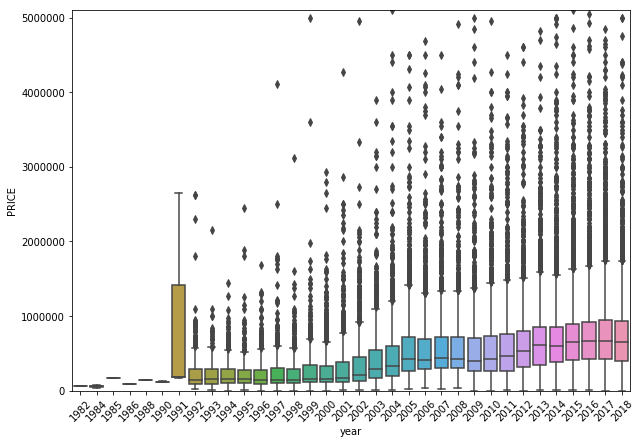

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(dc_re_resid['year'], dc_re_resid['PRICE'])
plt.xticks(rotation=45)
plt.ylim(0,5100000)
plt.show()

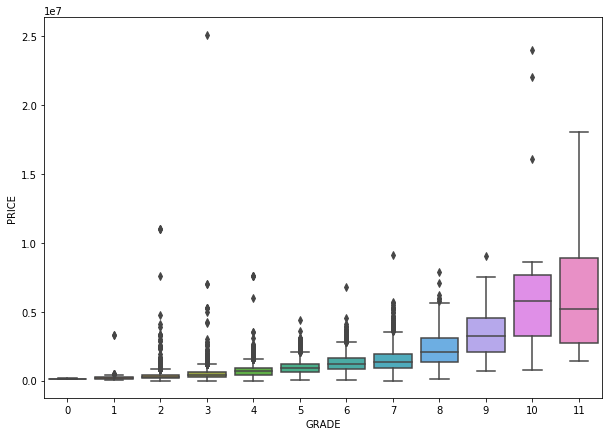

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(dc_re_resid['GRADE'], dc_re_resid['PRICE'])
plt.show()

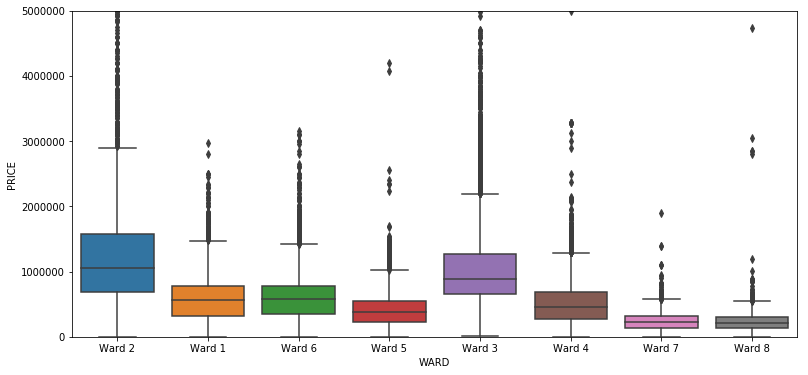

In [17]:
plt.figure(figsize=(13,6))
sns.boxplot(dc_re_resid['WARD'], dc_re_resid['PRICE'])
plt.ylim(0,5000000)
plt.show()

(0, 6000000)

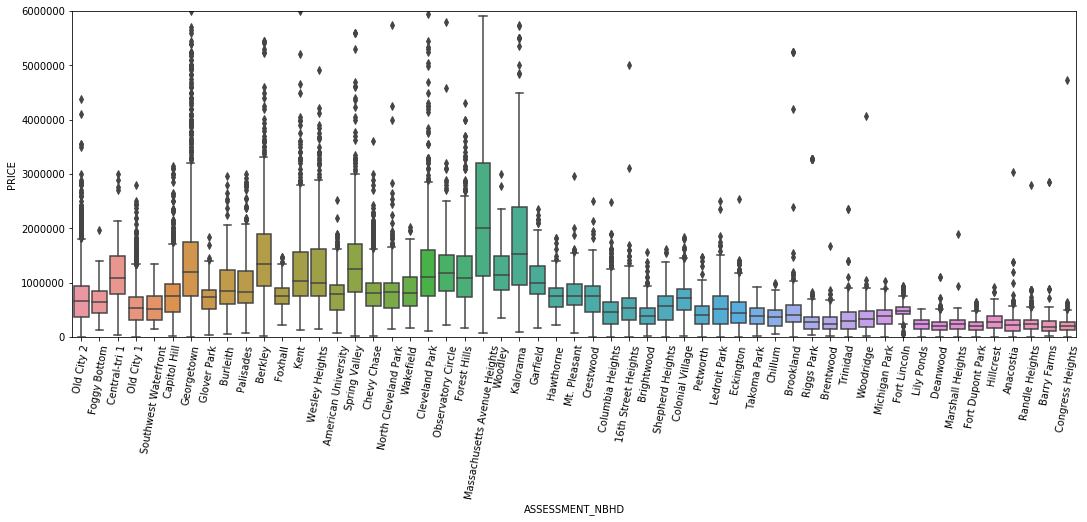

In [18]:
plt.figure(figsize=(18,6))
sns.boxplot(dc_re_resid['ASSESSMENT_NBHD'], dc_re_resid['PRICE'])
plt.xticks(rotation=80)
plt.ylim(0,6000000)

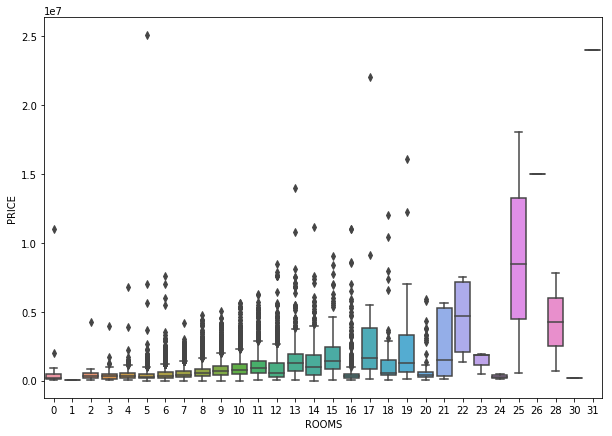

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(dc_re_resid['ROOMS'], dc_re_resid['PRICE'])
plt.show()

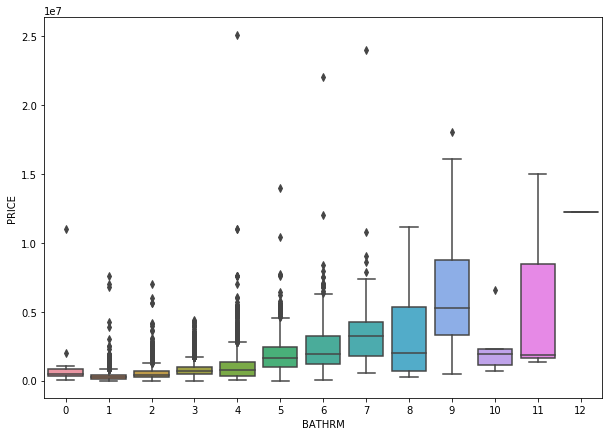

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(dc_re_resid['BATHRM'], dc_re_resid['PRICE'])
plt.show()

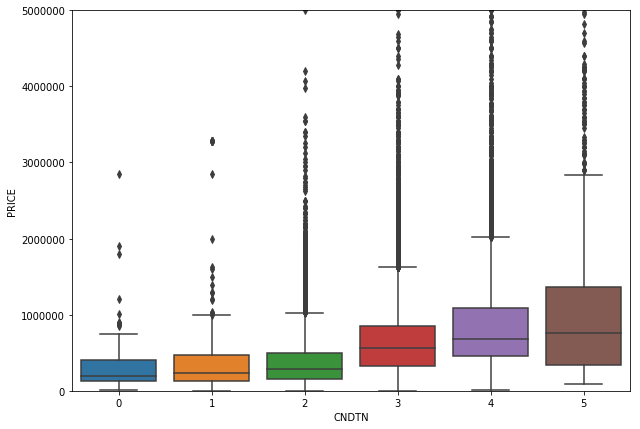

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(dc_re_resid['CNDTN'], dc_re_resid['PRICE'])
plt.ylim(0,5000000)
plt.show()

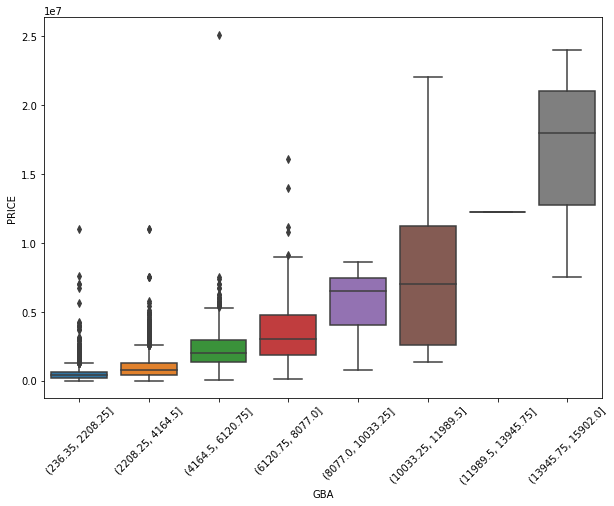

In [22]:
bins = pd.cut(dc_re_resid['GBA'], bins=8)
plt.figure(figsize=(10,7))
sns.boxplot(bins, dc_re_resid['PRICE'])
plt.xticks(rotation=45)
plt.show()

(0, 5000000)

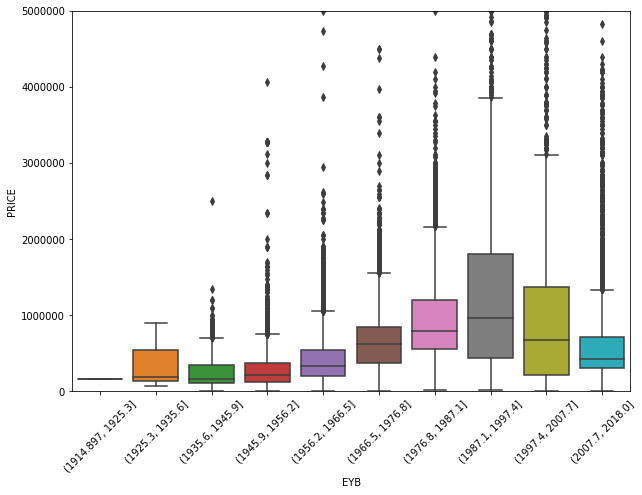

In [23]:
bins2= pd.cut(dc_re_resid['EYB'], bins=10)
plt.figure(figsize=(10,7))
sns.boxplot(bins2, dc_re_resid['PRICE'])
plt.xticks(rotation=45)
plt.ylim(0,5000000)

In [75]:
dc_re_resid['SQUARE'].nunique()

3119

In [24]:
dc_re_resid_dummies = pd.get_dummies(dc_re_resid)

In [25]:
x = dc_re_resid_dummies.drop(columns='PRICE')
y = dc_re_resid_dummies['PRICE'].values.reshape(-1, 1)

In [26]:
init_regr = linear_model.LinearRegression()
init_regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print('\nCoefficients: \n', init_regr.coef_)
print('\nIntercept: \n', init_regr.intercept_)
print('\nR-squared:')
print(init_regr.score(x, y))


Coefficients: 
 [[ 4.22914272e+04  1.86372206e+04 -1.31485485e+05 -6.25198007e+02
  -1.72288735e+04 -1.43746815e+03 -1.42611564e+03  1.29533159e+03
   9.21209466e+02  4.23464189e+03  2.61008126e+02  1.57571869e+06
   7.07376166e+04  9.26895400e+04  4.58213019e+04  4.36389176e+04
   3.21277498e+01 -8.45357071e+02 -1.03293944e+06 -1.74942376e+06
  -6.05450673e+00 -7.84256808e+00  2.63049160e+04  1.55968678e+03
  -5.75673066e+04  9.96419869e+03  9.41512005e+03 -7.63700410e+03
  -4.80344700e+03  6.32490254e+01  4.02603658e+04 -1.38566645e+04
   1.32496912e+04 -1.59555128e+05  1.40256542e+05  4.10244884e+03
   1.33486698e+04  1.27592642e+04 -1.33023040e+05  8.23355923e+04
   5.06874477e+04  4.04642040e+04 -4.04642040e+04  1.19252684e+05
   4.75331980e+04  9.76282163e+04  2.82301008e+04  6.40461011e+03
   1.00764240e+03 -4.78539997e+04 -7.51613003e+04  7.76902358e+05
  -4.68950337e+04  1.95377746e+05 -1.78746196e+05  1.85581254e+05
  -9.18259203e+04 -1.11262475e+06  1.35073616e+05  5.887454

In [28]:
init_predicted = init_regr.predict(x)
print('Root Mean Square Error:', sqrt(mean_squared_error(y, init_predicted)))

Root Mean Square Error: 333764.513541134


In [29]:
residual = y - init_predicted

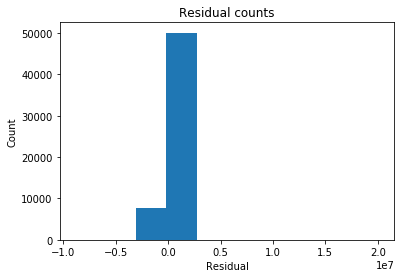

In [30]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

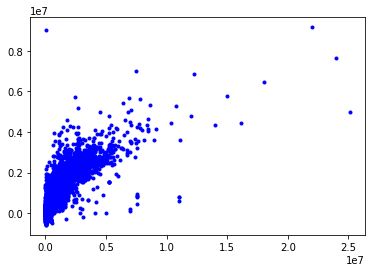

In [31]:
plt.plot(dc_re_resid['PRICE'], init_predicted, 'b.')
plt.show()

In [33]:
init_pls = PLSRegression(n_components=30)

In [34]:
init_pls.fit(x,y)
init_pred_pls = init_pls.predict(x)

In [35]:
print('R^2 for partial least squares:', init_pls.score(x,y))
print('Root mean square error:', sqrt(mean_squared_error(y,init_pred_pls)))

R^2 for partial least squares: 0.6891902707666447
Root mean square error: 333773.33188643557


In [36]:
lr_L1 = linear_model.Lasso()
lr_L1.fit(x, y)
pred_lrl1 = lr_L1.predict(x)

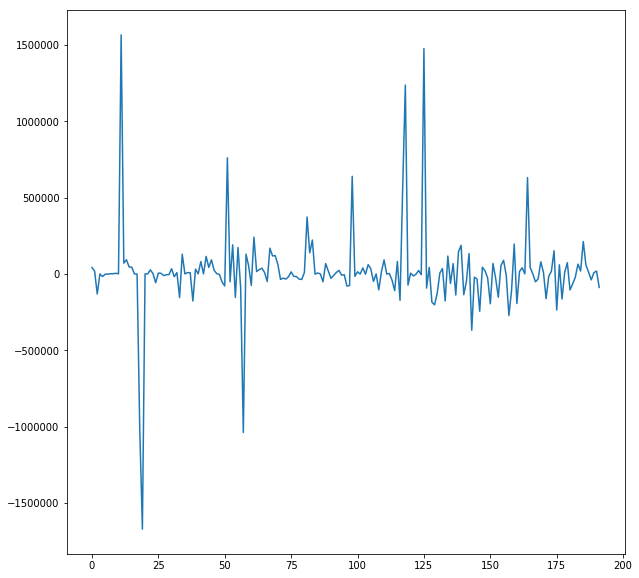

In [37]:
plt.figure(figsize=(10,10))
plt.plot(lr_L1.coef_.flatten())
plt.show()

In [38]:
print('R^2 for Lasso Regression:', lr_L1.score(x,y))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y, pred_lrl1)))

R^2 for Lasso Regression: 0.6892042874691353
Root Mean Squared Error: 333765.80565125146


In [45]:
init_ridge = linear_model.Ridge()

In [46]:
init_ridge.fit(x,y)
pred_ridge = init_ridge.predict(x)

In [48]:
print('R^2 for Lasso Regression:', init_ridge.score(x,y))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y, pred_ridge)))

R^2 for Lasso Regression: 0.6891067848064771
Root Mean Squared Error: 333818.15595966333


In [39]:
init_rfr = ensemble.RandomForestRegressor()

In [40]:
init_rfr.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Features sorted by their score:


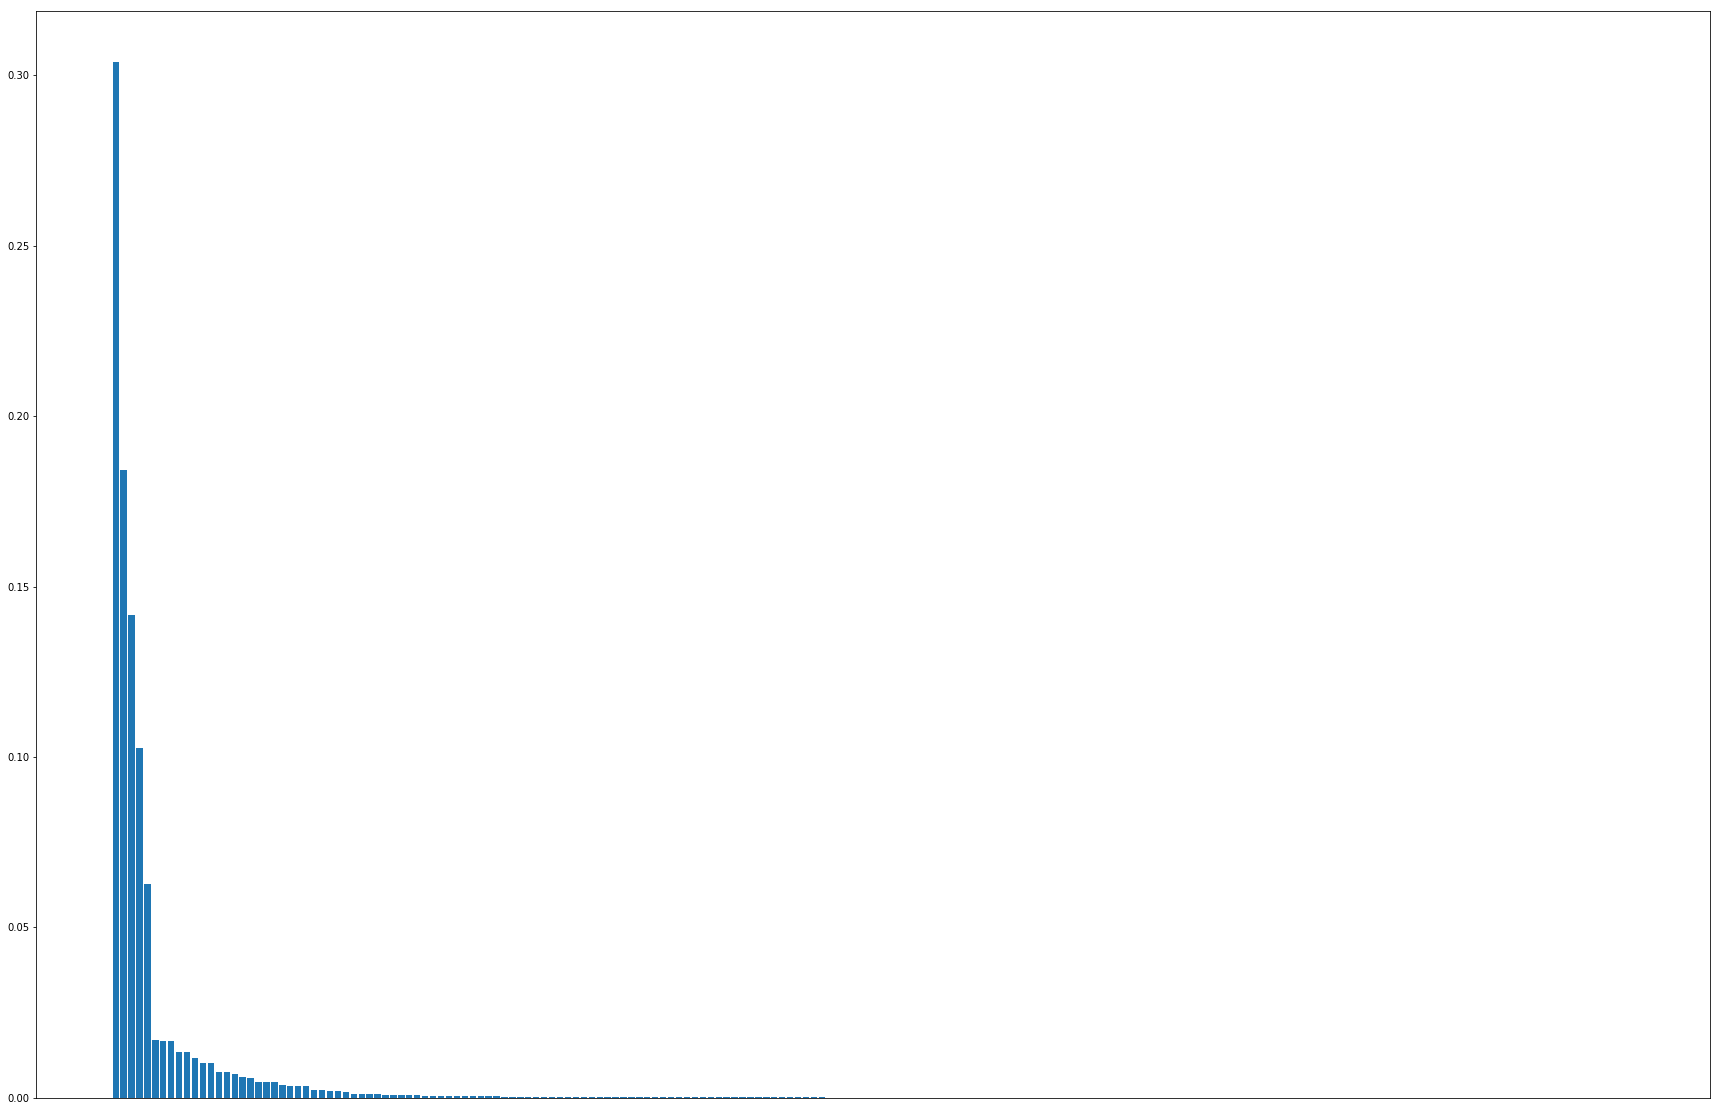

In [73]:
names = x.columns
y_sort = sorted(init_rfr.feature_importances_, reverse=True)
print("Features sorted by their score:")
plt.figure(figsize=(30,20))
plt.bar(names, y_sort)
plt.xticks([])
plt.show()

In [77]:
resid = dc_re_resid

In [78]:
resid['yrs_since_sale'] = 2018 - resid['year']
resid.drop(columns=['HEAT', 'EXTWALL', 'AC', 'INTWALL', 'ASSESSMENT_NBHD', 'STYLE', 'ROOF', 'ZIPCODE'], inplace=True)

In [79]:
resid = pd.get_dummies(resid)

In [80]:
X = resid.drop(columns='PRICE')
y = resid['PRICE'].values.reshape(-1, 1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1451)

In [82]:
params = {'n_estimators': 200,
          'max_depth': 12,
          'loss': 'huber',
          'learning_rate':0.25 
         }

gbr = ensemble.GradientBoostingRegressor(**params)

In [83]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.25, loss='huber', max_depth=12,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [84]:
pred_gbr = gbr.predict(X_test)

In [85]:
print('R^2 for Gradient Boost Regression:', gbr.score(X_test, y_test))
print('RMSE for Gradient Boost Regression:', sqrt(mean_squared_error(y_test,pred_gbr)))

R^2 for Gradient Boost Regression: 0.8720888174254725
RMSE for Gradient Boost Regression: 214169.87920588674


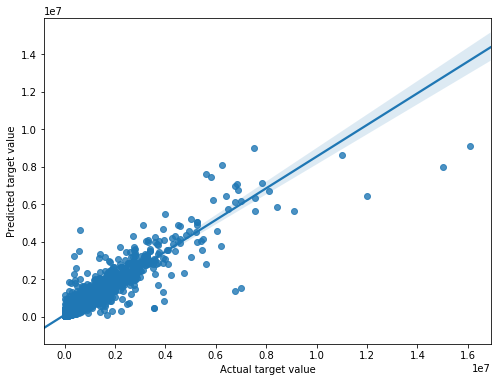

In [96]:
plt.figure(figsize=(8,6))
sns.regplot(y_test, pred_gbr, fit_reg=True, ci=95)
plt.xlabel('Actual target value')
plt.ylabel('Predicted target value')
plt.show()

In [97]:
rfr = ensemble.RandomForestRegressor(n_estimators=200, max_depth=35)

In [99]:
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)

In [100]:
print('R^2 for Random Forest Regression:', rfr.score(X_test, y_test))
print('RMSE for Random Forest Regression:', sqrt(mean_squared_error(y_test,pred_rfr)))

R^2 for Random Forest Regression: 0.8423440348895203
RMSE for Random Forest Regression: 237771.24860953313


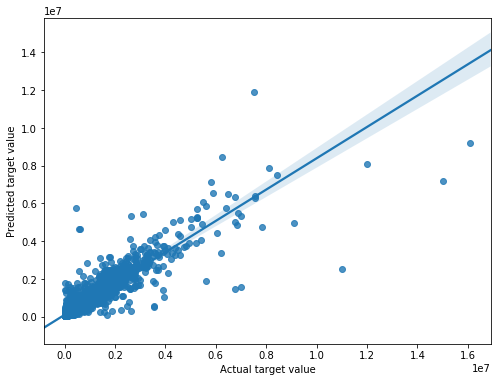

In [101]:
plt.figure(figsize=(8,6))
sns.regplot(y_test, pred_rfr, fit_reg=True, ci=95)
plt.xlabel('Actual target value')
plt.ylabel('Predicted target value')
plt.show()

In [103]:
ols = linear_model.LinearRegression()

In [104]:
ols.fit(X_train, y_train)
pred_ols = ols.predict(X_test)

In [105]:
print('R^2 for Linear Regression:', ols.score(X_test, y_test))
print('RMSE for Linear Regression:', sqrt(mean_squared_error(y_test,pred_ols)))

R^2 for Linear Regression: 0.6724797923977602
RMSE for Linear Regression: 342707.1654905112


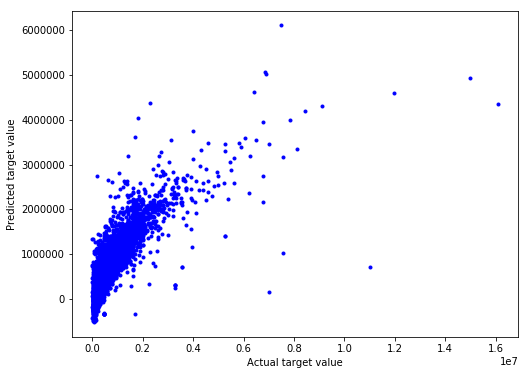

In [116]:
plt.figure(figsize=(8,6))
plt.plot(y_test, pred_ols, 'b.')
plt.xlabel('Actual target value')
plt.ylabel('Predicted target value')
plt.show()

In [126]:
ridge = linear_model.Ridge(alpha=5)

In [127]:
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

In [128]:
print('R^2 for Ridge Regression:', ridge.score(X_test, y_test))
print('RMSE for Ridge Regression:', sqrt(mean_squared_error(y_test,pred_ridge)))

R^2 for Ridge Regression: 0.6722687202133449
RMSE for Ridge Regression: 342817.57745561376


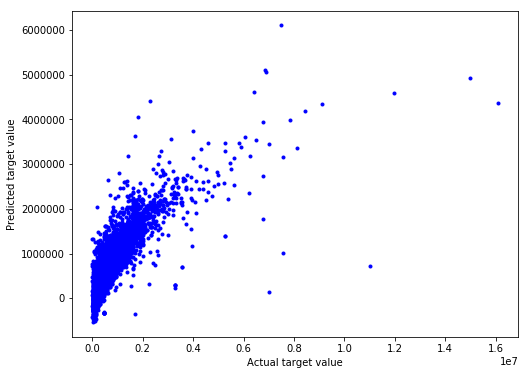

In [131]:
plt.figure(figsize=(8,6))
plt.plot(y_test, pred_ridge, 'b.')
plt.xlabel('Actual target value')
plt.ylabel('Predicted target value')
plt.show()